Iris dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set


Paper: https://rcs.chemometrics.ru/old/Tutorials/classification/Fisher.pdf

# Supervised Feature Selection

In [1]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest

data = sns.load_dataset('iris')
y = data['species']
X = data
del X['species']
print(set(y))
X.head()

{'versicolor', 'setosa', 'virginica'}


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# Trying to find the single feature that best describes the target
kbest = SelectKBest(k=1).fit(X, y)
print('selected:',X.columns[kbest.get_support()])

selected: Index(['petal_length'], dtype='object')


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy
from sklearn.metrics import accuracy_score
#Train a model
forest = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)#split train test RANDOMLY
forest.fit(X_train, y_train)

print(dict(zip(X.columns,forest.feature_importances_))) #print the feature importance found by random forest
best_feature = X.columns[numpy.argmax(forest.feature_importances_)]
print(f'best single feature: {best_feature}')

print('score with all features')
print(accuracy_score(y_test, forest.predict(X_test))) 

{'sepal_length': 0.0983732282540144, 'sepal_width': 0.040953940122995136, 'petal_length': 0.4093868247751606, 'petal_width': 0.4512860068478299}
best single feature: petal_width
score with all features
0.98


We found the best features, in order. The accuracy is very high. 

We'll now try to train the model with only a single feature, and see how it does. 

In [4]:

print('score with a single feature:')
best_feature ='petal_length'
X_train_new = X_train[[best_feature]]
X_test_new = X_test[[best_feature]]
forst_single = RandomForestClassifier(random_state=0).fit(X_train_new,y_train)
accuracy_score(y_test, forst_single.predict(X_test_new))

score with a single feature:


0.96

Very similar performance with just a single feature!

# Anyone familiar with another method for finding feature importance?

# Back to slides

In [5]:
def plot_image(orig,transformed=None):
    plt.subplot(1, 2, 1);
    plt.imshow(orig.reshape(28,28))
    plt.title('Original Image', fontsize = 20);
    if transformed is not None:
        plt.subplot(1, 2, 2);
        plt.imshow(transformed.reshape(28, 28))
        plt.title('Transformed', fontsize = 20);

In [6]:
from sklearn.decomposition import PCA
from keras.datasets import mnist,fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_size=60000
test_szie=10000
image_w=28
image_h=28


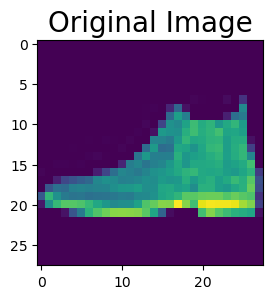

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_image(x_test[0])

# Reshape into array (flat)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
#reshaping the data into 1D.  We lose a lot of information this way! relationship between close pixel. 
x_train = x_train.reshape(len(x_train),image_h*image_w)
x_test = x_test.reshape(len(x_test),image_h*image_w)
x_train.shape

(60000, 784)

In [10]:
#normalizing the data - VERY IMPORTANT
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=True)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test) # transform without fit...
x_train.var(axis=0)[:10] # we get equal variance because of the scaling

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
#reduce each image into 100 dim array instead of 784 # CAREFUL THIS CELL IS SLOW AS HELL
pca = PCA(100)
pca.fit(x_train)
TRAIN= pca.transform(x_train)
TEST = pca.transform(x_test)
TRAIN.shape

(60000, 100)

In [12]:
#Return to original representation
#Remebed: data which was discarded (684 feautres) is already gone!
approximation = pca.inverse_transform(TEST)
approximation.shape

(10000, 784)

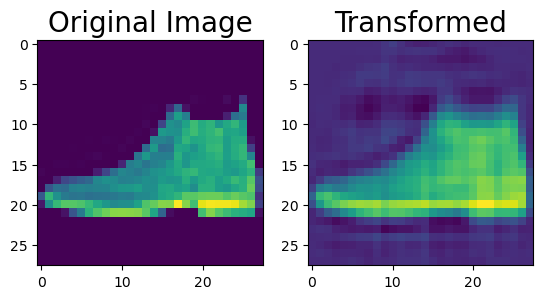

In [13]:
#original Vs compressed (not we also undo the scaling here)
plot_image(scaler.inverse_transform(x_test)[0],scaler.inverse_transform(approximation)[0])


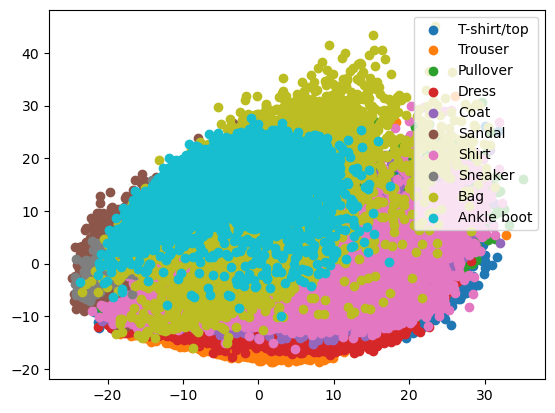

In [14]:
#Why do i want 2 dimensions? Why is it useful? To plot stuff
pca = PCA(2)
pca.fit(x_train)
TRAIN= pca.transform(x_train)
TEST = pca.transform(x_test)
approximation = pca.inverse_transform(TEST)


### 
plots=[]
for y,name in enumerate(class_names):
    new_set = TRAIN
    X=np.array([x for i,x in enumerate(new_set[:, 0]) if y_train[i]==y]).reshape(-1)
    Y=np.array([x for i,x in enumerate(new_set[:, 1]) if y_train[i]==y]).reshape(-1)
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()

We can't really understand anything from this plot. PCA is not plotting friendly. The point here is understanding it. We'll learn some plotting-friendly methods next. 

# Back to slides

In [15]:
import pandas as pd
data = pd.read_json('{"A":{"0":1.0,"1":0.86,"2":0.49,"3":0.65},"B":{"0":0.86,"1":1.0,"2":-0.01,"3":0.19},"C":{"0":0.49,"1":-0.01,"2":1.0,"3":0.98},"D":{"0":0.65,"1":0.19,"2":0.98,"3":1.0}}')
print(data.head())
data = data.values


      A     B     C     D
0  1.00  0.86  0.49  0.65
1  0.86  1.00 -0.01  0.19
2  0.49 -0.01  1.00  0.98
3  0.65  0.19  0.98  1.00


In [16]:
pca = PCA(2)
data = data-data.mean(axis=1)
pca.fit(data)
print(pca.transform(data))

[[ 0.37318207  0.25373563]
 [ 0.9368777  -0.17409612]
 [-0.73644195 -0.13962635]
 [-0.57361781  0.05998684]]


# What did the PCA object learned?
What did the object use for the transform operation?
What mathematical operation was used in the transform?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




In [17]:
# this is the same matrix we saw when transforming the data through the pca object (previous code cell)
# so basically PCA learns the matrix the allows multiplying and getting the feature-thin matrix. 
np.dot(data, pca.components_.T) 

array([[ 0.37318207,  0.25373563],
       [ 0.9368777 , -0.17409612],
       [-0.73644195, -0.13962635],
       [-0.57361781,  0.05998684]])

# Back to slides

# Choosing the number of components

In [18]:
pca = PCA(image_w*image_h) # start by training on all the features
pca.fit(x_train)

PCA(n_components=784)

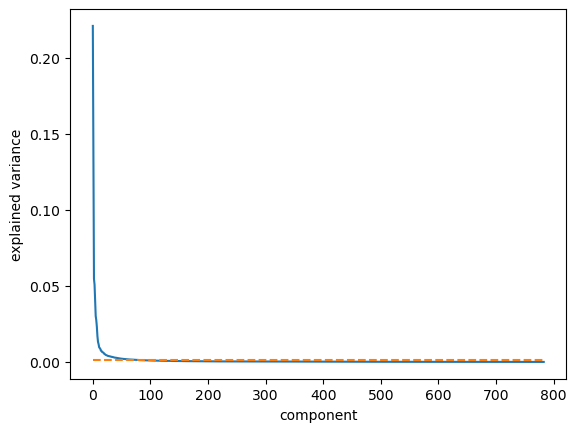

In [19]:
plt.plot(pca.explained_variance_ratio_) # this plot shows variance that's explained by each feature. You can see diminishing returs after ~50. 

plt.plot(range(len(pca.explained_variance_ratio_)),[pca.explained_variance_ratio_.mean()]*len(pca.explained_variance_ratio_), label='Mean', linestyle='--')
plt.xlabel('component')
plt.ylabel('explained variance');


# Where is the elbow?

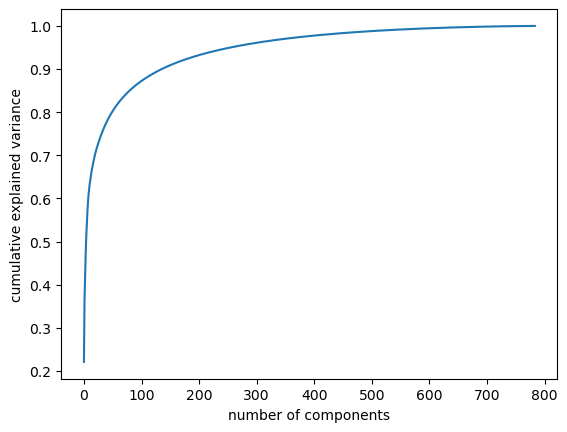

In [20]:

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # cumulative plot works as well. We can see that 100 components  yiels 80% of the cariance, which is the reccomended rule of thumb amount
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


# Where is the elbow here?

# Back to slides

# Locally Linear Embedding

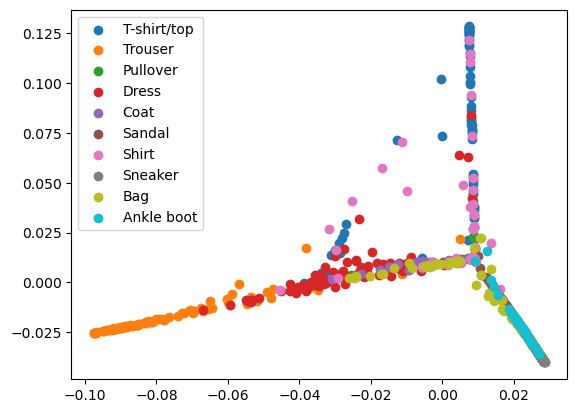

<bound method LocallyLinearEmbedding.transform of LocallyLinearEmbedding()>

In [21]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2,n_neighbors=5)
X_transformed_lle = embedding.fit_transform(x_train[:1000])


plots=[]
for y,name in enumerate(class_names):    
    X=np.array([x for i,x in enumerate(X_transformed_lle[:, 0]) if y_train[i]==y])
    Y=np.array([x for i,x in enumerate(X_transformed_lle[:, 1]) if y_train[i]==y])
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()
embedding.transform
#Does the result look good?

# Back to slides

# t-SNE

In [22]:
subset=1000#using subset to save time.

c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files\Anaconda3\envs\py4dp\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


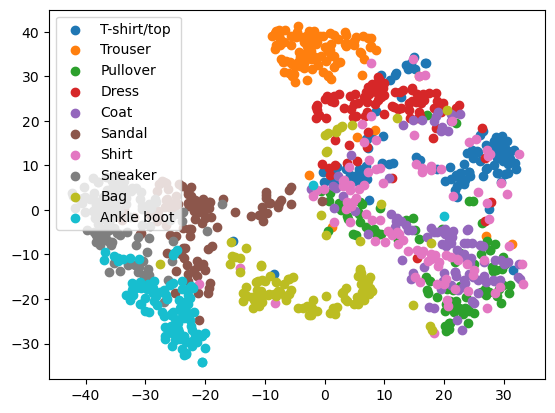

In [23]:

from sklearn.manifold import TSNE
tsne=TSNE(n_components=2) #n_iter=250
TRAIN = tsne.fit_transform(x_train[:subset])
plots=[]
for y,name in enumerate(class_names):    
    X=np.array([x for i,x in enumerate(TRAIN[:, 0]) if y_train[i]==y])
    Y=np.array([x for i,x in enumerate(TRAIN[:, 1]) if y_train[i]==y])
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()


# How about just tranforming new data now??

# back to slides

# UMAP

In [24]:
!pip install umap-learn

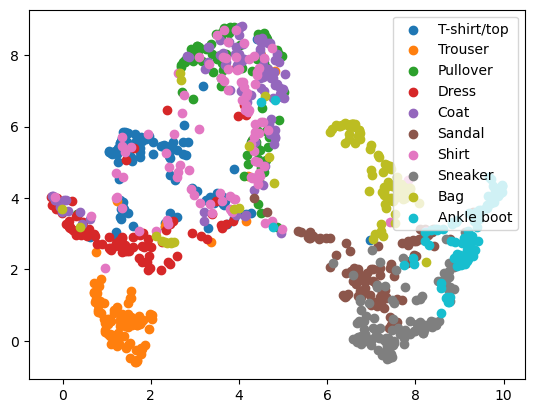

In [25]:
import umap

umap = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="euclidean") #those are deafult params in the package
TRAIN = umap.fit_transform(x_train[:subset])


plots=[]
for y,name in enumerate(class_names):    
    X=np.array([x for i,x in enumerate(TRAIN[:, 0]) if y_train[i]==y])
    Y=np.array([x for i,x in enumerate(TRAIN[:, 1]) if y_train[i]==y])
    p= plt.scatter(X, Y)
    plots.append(p)
plt.legend(plots,class_names)
plt.show()
